## Dataset Description

You have been provided power consumption data of 1000 households. 

Attribute Information:

1.date: Date in format dd/mm/yyyy 
2.time: time in format hh:mm:ss 
3.global_active_power: household global minute-averaged active power (in kilowatt) 
4.global_reactive_power: household global minute-averaged reactive power (in kilowatt) 
5.voltage: minute-averaged voltage (in volt) 
6.global_intensity: household global minute-averaged current intensity (in ampere) 
7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered). 
8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light. 
9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

**Problem Statement ** Cluster the households using any clustering algorithm based on their power consumption and give analysis of your clusters.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
df = pd.read_csv('C:/Users/Aravind/Desktop/ML Assignment/K Means/Assignment/Power Consumption.csv', sep=';')

In [8]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


## Question : Perform Feature Engineering on the columns of the dataset

In [12]:
df_num = df.drop(['Date', 'Time'], axis = 1)

In [13]:
df_num.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [14]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 7 columns):
Global_active_power      999 non-null float64
Global_reactive_power    999 non-null float64
Voltage                  999 non-null float64
Global_intensity         999 non-null float64
Sub_metering_1           999 non-null float64
Sub_metering_2           999 non-null float64
Sub_metering_3           999 non-null float64
dtypes: float64(7)
memory usage: 54.7 KB


In [15]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

**No missing values**

## Question : Perform Descriptive Statistics on the dataset and come up with insights on shape, spread and central deviation 

In [16]:
df_num.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,999.000000,999.000000,999.000000,999.000000,999.0,999.000000,999.000000
mean,2.418136,0.089261,240.038278,10.347948,0.0,2.751752,5.743744
std,1.240437,0.088127,4.085708,5.123870,0.0,8.107645,8.061661
min,0.206000,0.000000,230.980000,0.800000,0.0,0.000000,0.000000
25%,1.802000,0.000000,236.940000,8.400000,0.0,0.000000,0.000000
50%,2.414000,0.072000,240.650000,10.000000,0.0,0.000000,0.000000
75%,3.308000,0.126000,243.300000,14.000000,0.0,1.000000,17.000000
max,7.706000,0.528000,249.370000,33.200000,0.0,38.000000,19.000000


Sub_metering_1 corresponds to the power consumed in kitchen like dishwasher, an oven and a microwave. It seems these households don't have one.<br>
We can drop this column.

In [17]:
df_num.drop(['Sub_metering_1'], axis=1, inplace=True)

## Question: Perform EDA and check if you can find any correlation between columns

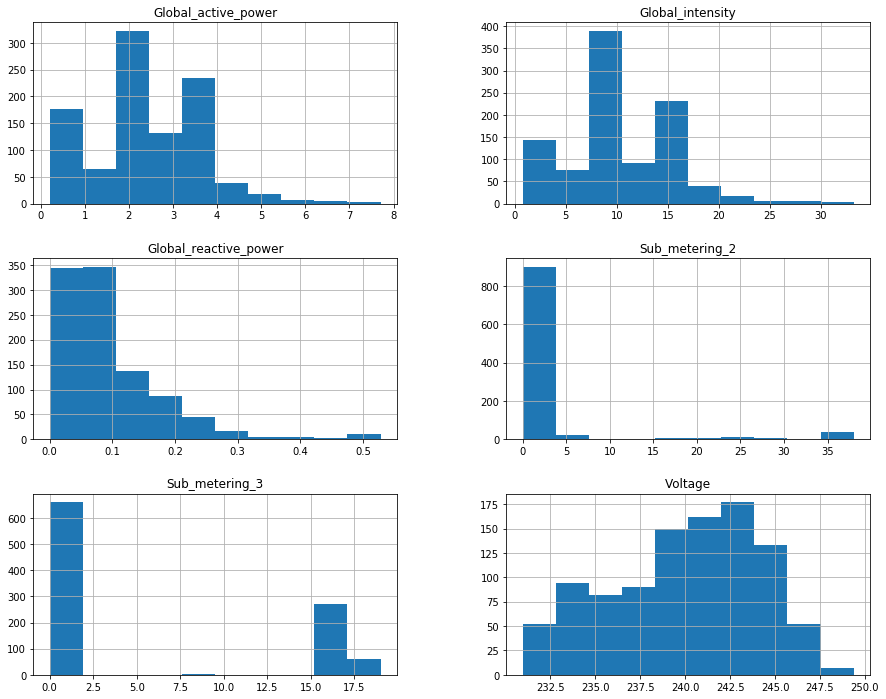

In [23]:
# Lets observe the distributions of all the measurements.

df_num.hist(bins=10, figsize=(15,12))
plt.show()

All the distributions are skewed. <br>
Global_intensity and Global_active_power have similar graphs. Can they be correlated? <br>
We know that Electric Power is Voltage times Current  <br> 

In [34]:
corr = df_num.corr()
corr

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.130010,-0.696662,0.995521,0.419178,0.527776
Global_reactive_power,0.130010,1.000000,-0.063961,0.141408,0.135622,-0.005987
Voltage,-0.696662,-0.063961,1.000000,-0.710019,-0.118796,-0.697866
Global_intensity,0.995521,0.141408,-0.710019,1.000000,0.430683,0.538529
Sub_metering_2,0.419178,0.135622,-0.118796,0.430683,1.000000,-0.100483
Sub_metering_3,0.527776,-0.005987,-0.697866,0.538529,-0.100483,1.000000


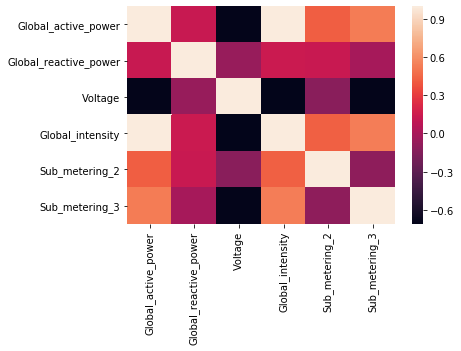

In [35]:
sns.heatmap(corr)
plt.show()

We observe that **'Global Intensity'** and **'Global Active Power'** has strong correlation of 0.99  <br>
**Global Active Power** has good negetive correlation with **Voltage** with correlation = -0.69  <br>
**Voltage** and **Global Intensity** have have strong negetive correlation = -0.71   <br>

**Sub_metering_3** has good correlation with **Global Active Power and Global_Intensty** and negetive correlation with **Voltage**.  <br>
It seems most of the power is consumed by electric water-heater and an air-conditioner.

Sub_metering_2 has some correlation with Global Active Power and Global_Intensty. <br>
This energy is consumed by laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

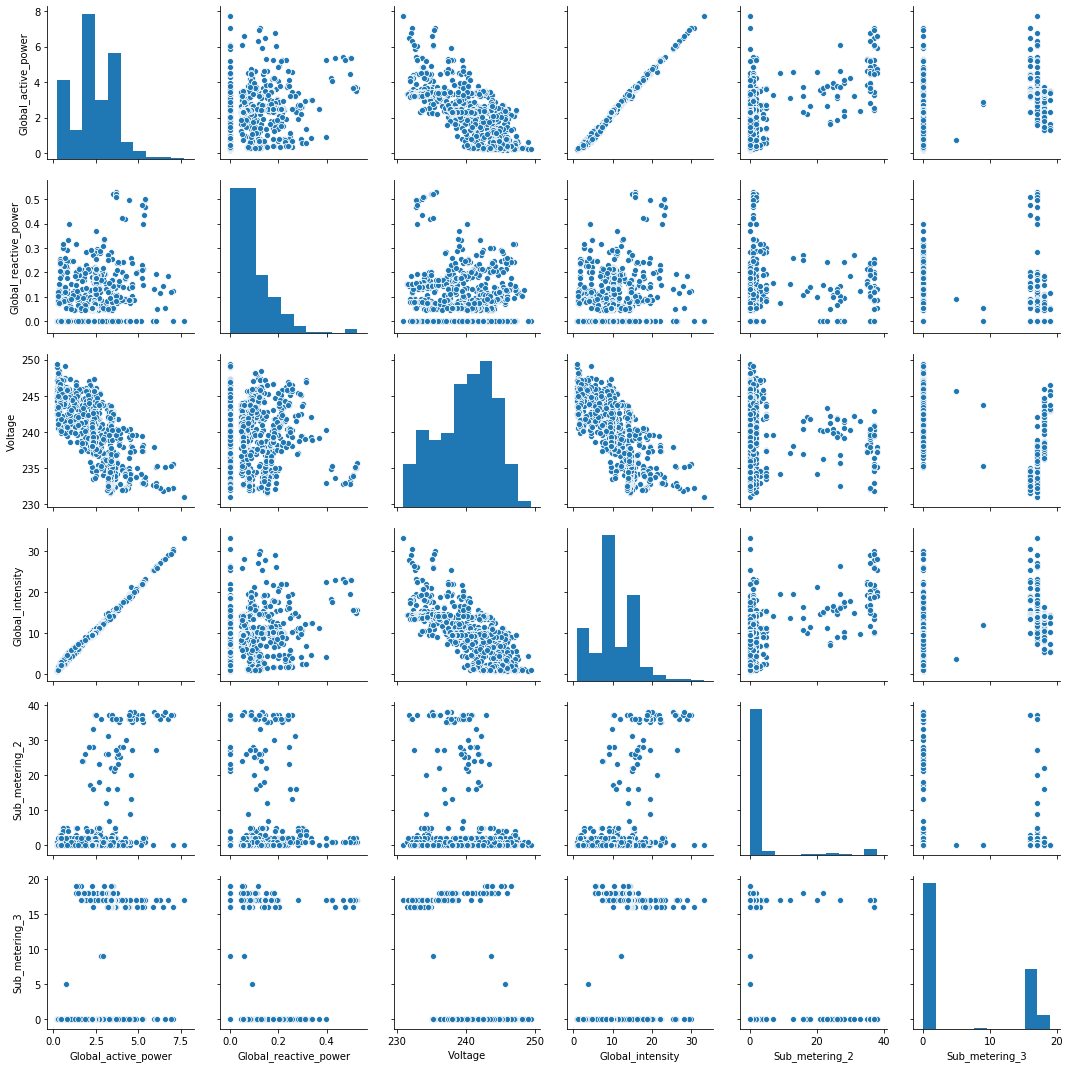

In [37]:
### Lets see these relations in a pair plot

sns.pairplot(df_num, kind='scatter')
plt.show()

Here we can clearly observe some strong correlations. The weak correlations are a bit difficult to identify.

**Global_reactive_power** has no relations with any of the rest of the variables. So, we can skip it for our clustering algorithm.

In [38]:
df_num.drop(['Global_reactive_power'], axis=1, inplace=True)

In [39]:
df_num.head()

,Global_active_power,Voltage,Global_intensity,Sub_metering_2,Sub_metering_3
0,4.216,234.84,18.4,1.0,17.0
1,5.360,233.63,23.0,1.0,16.0
2,5.374,233.29,23.0,2.0,17.0
3,5.388,233.74,23.0,1.0,17.0
4,3.666,235.68,15.8,1.0,17.0


In [40]:
# Global_active_power and Sub_metering_3
X = df_num[['Global_active_power','Sub_metering_3','Sub_metering_2']].values

## Question : Identify optimal number of clusters using Elbow Method

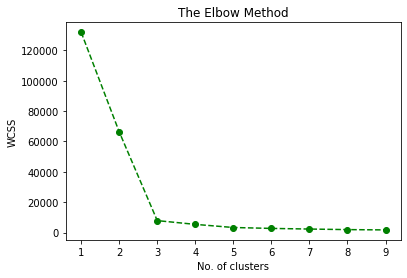

In [45]:
# Using elbow method find optimal number of clusters
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10), wcss, 'go--')
plt.title('The Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

Number of clusters is **3**.  <br>
This implies, households with very little power consumption.  <br>
Households with power consumption in either **Sub_metering_2 or Sub_metering_3**.  <br>
Households with large power consumtion in both **Sub_metering_2 and Sub_metering_3**.

In [46]:
#Creating model
kmeans = KMeans(n_clusters = 3, init='k-means++', max_iter=500, n_init=10, random_state=10)

In [47]:
#Fitting the model
y_kmeans = kmeans.fit_predict(X)

## Question : Visualize the clusters and come up with your analysis

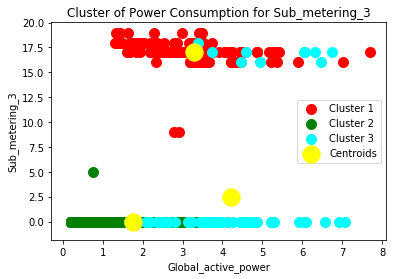

In [48]:
# Visualizing the results

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='green', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='cyan', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Centroids')
plt.title('Cluster of Power Consumption for Sub_metering_3')
plt.xlabel('Global_active_power')
plt.ylabel('Sub_metering_3')
plt.legend()
plt.show()

According to this graph a lot of households have very high usage in Sub_metering_3.  <br>
Lot of power is consumed by electric water-heater and an air-conditioner.

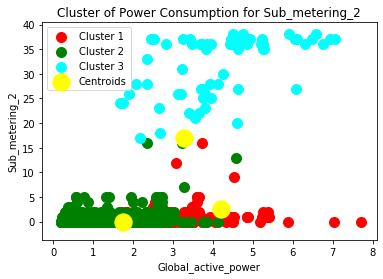

In [49]:
# Visualizing the results

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 2], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 2], s=100, c='green', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 2], s=100, c='cyan', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Centroids')
plt.title('Cluster of Power Consumption for Sub_metering_2')
plt.xlabel('Global_active_power')
plt.ylabel('Sub_metering_2')
plt.legend()
plt.show()

This graph shows medium usage of power in Sub_metering_2. <br>
This power is consumed by  laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.  <br>
These appliances consume much lower power than air-conditioner or water heater.  <br>
You can also observe that cluster 1 and 3 have interchanged their positions.  <br>
People who consume high energy in Sub_metering_3 don't have much bill in Sub_metering_2.  <br>
People who consume high energy in Sub_metering_2 have somewhat usage in Sub_metering_3.  <br>
Cluster 2 describes people who don't have much power usage in both Sub_metering_2 and Sub_metering_3.  <br>
This describes what kind of power usage(or electric devices) different cluster of people have.

### The End